In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('C:\\Users\\HP\\split-dataset2\\train'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        #print(filename)
        label=filename.split("_")[-1]
        #print(label)
        label=label.split(".")[0]
        labels.append(label.lower())
        #print(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [3]:
#craetinga dataframe
df=pd.DataFrame()
df["Speech"]=paths
df["Labels"]=labels
df.head()

,Speech,Labels
0,C:\Users\HP\split-dataset2\train\OAF_angry\OAF...,angry
1,C:\Users\HP\split-dataset2\train\OAF_angry\OAF...,angry
2,C:\Users\HP\split-dataset2\train\OAF_angry\OAF...,angry
3,C:\Users\HP\split-dataset2\train\OAF_angry\OAF...,angry
4,C:\Users\HP\split-dataset2\train\OAF_angry\OAF...,angry


In [4]:
df["Labels"].value_counts()

angry      280
disgust    280
fear       280
happy      280
neutral    280
ps         280
sad        280
Name: Labels, dtype: int64

In [5]:
def wave(data,sample_rate,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sample_rate)
    plt.show()

def spectogram(data,sample_rate,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr= sample_rate, x_axis="time", y_axis="hz")
    plt.colorbar()

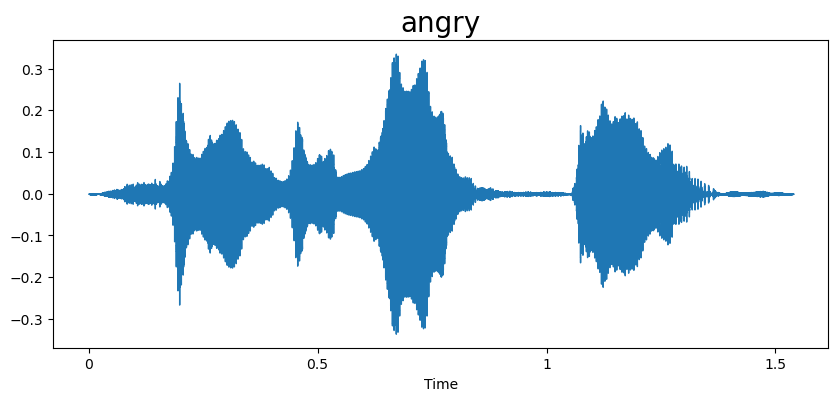

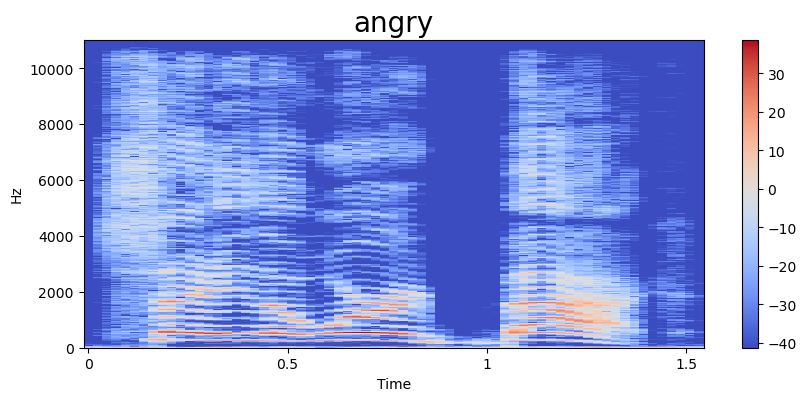

In [6]:
emotion="angry"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

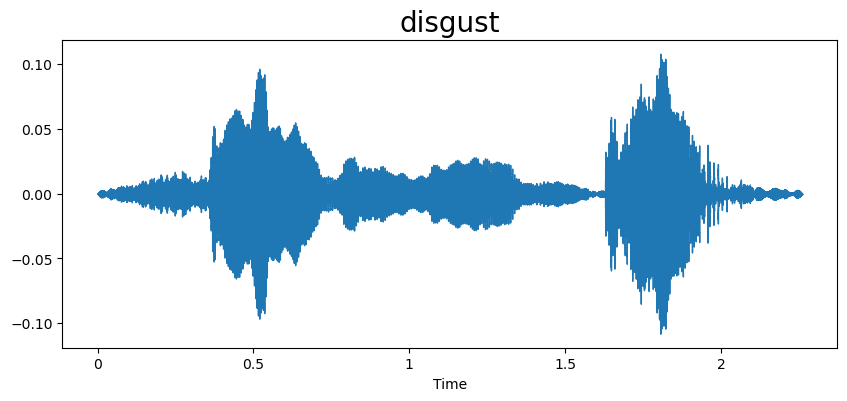

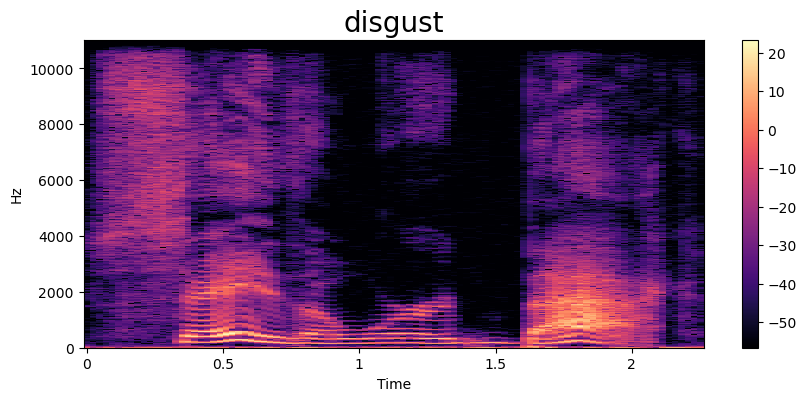

In [7]:
emotion="disgust"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

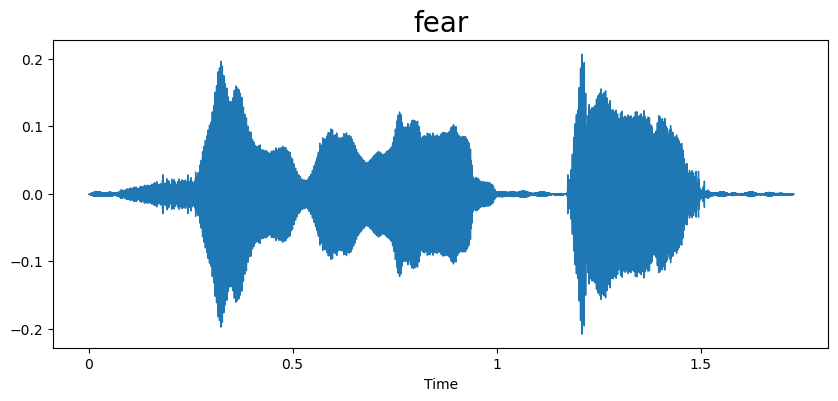

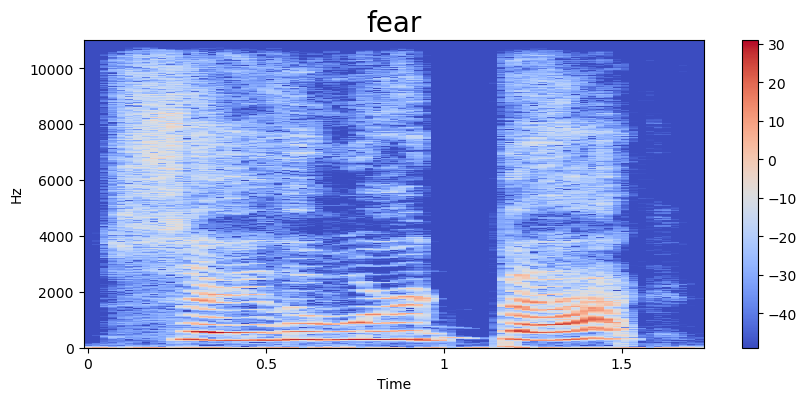

In [8]:
emotion="fear"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

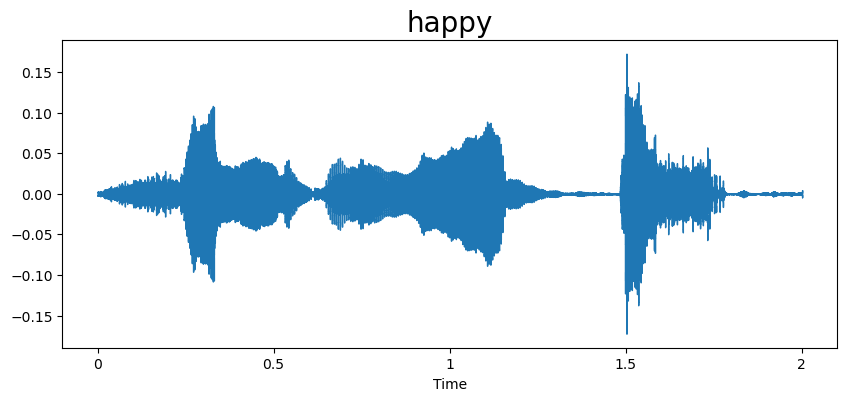

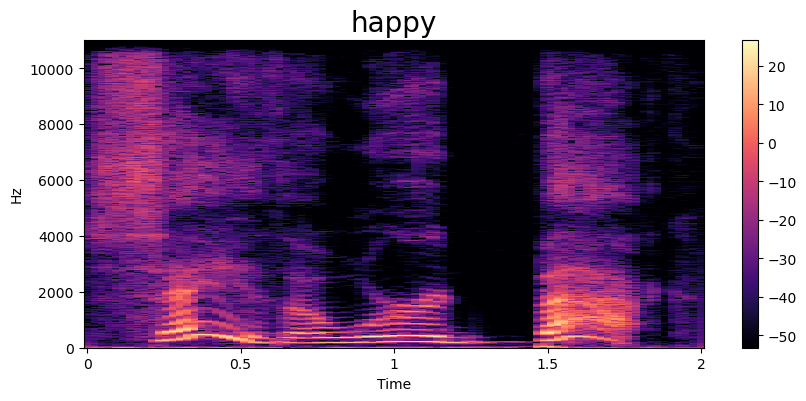

In [9]:
emotion="happy"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

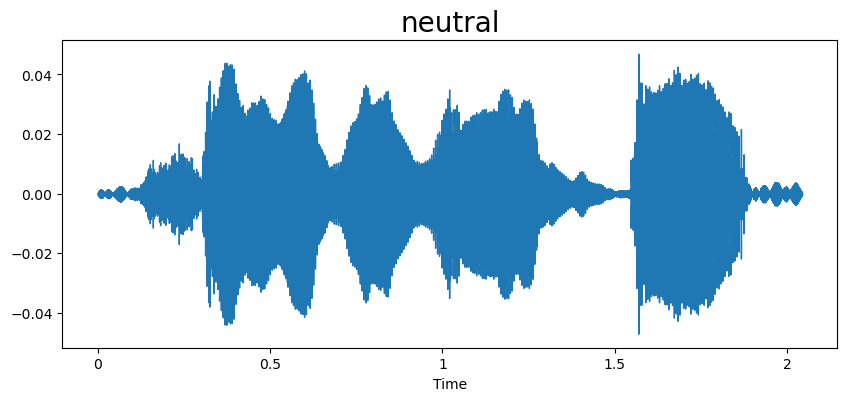

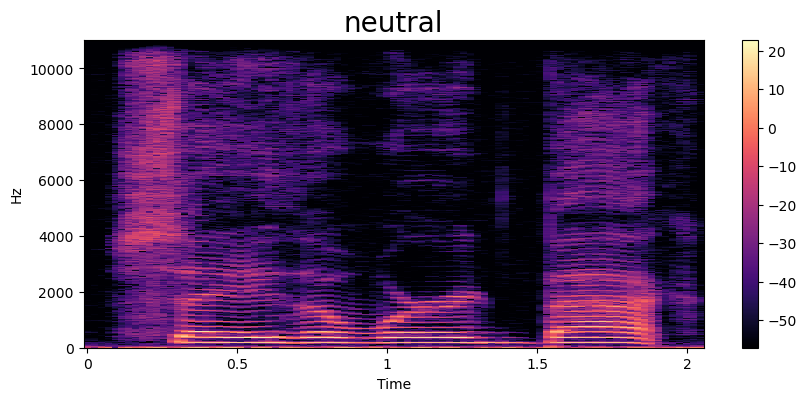

In [10]:
emotion="neutral"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

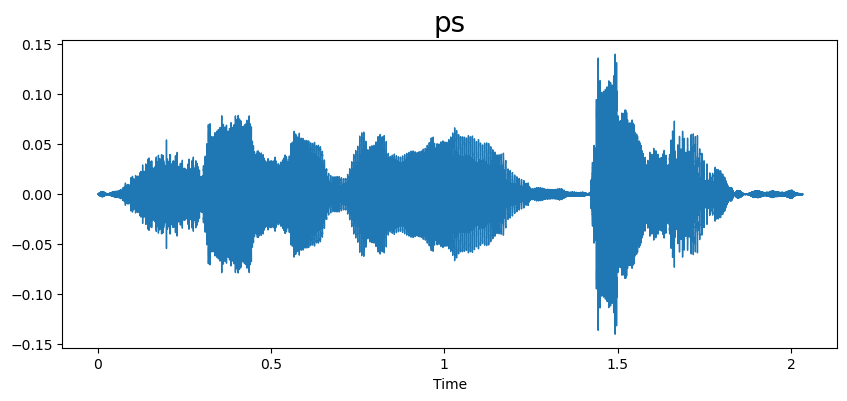

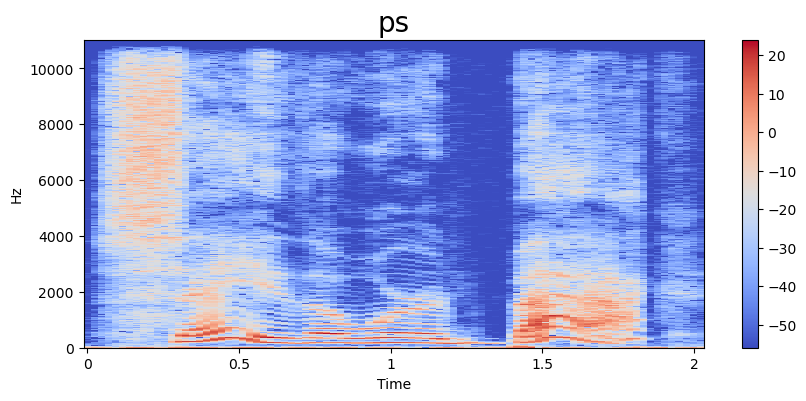

In [11]:
emotion="ps"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

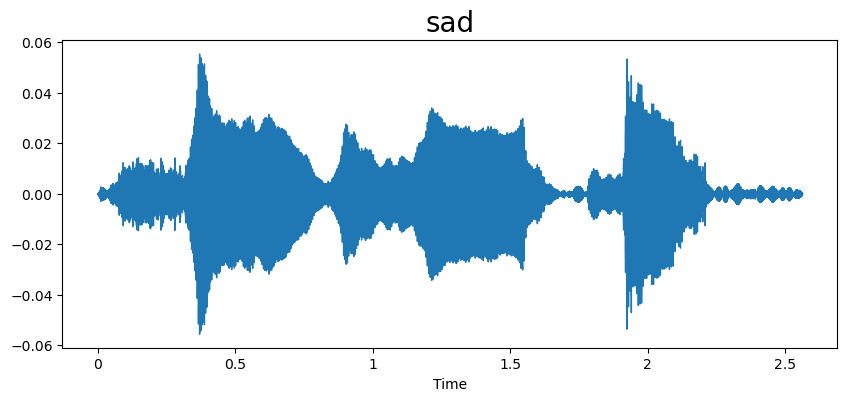

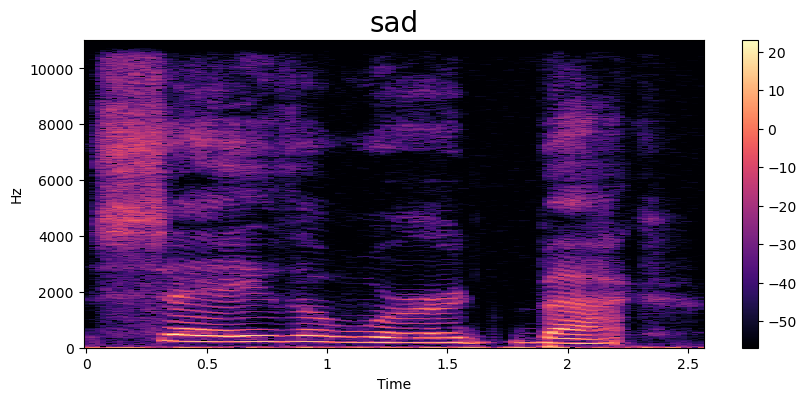

In [12]:
emotion="sad"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
wave(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [13]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=50).T,axis=0)
    return mfcc

In [18]:
df["Speech"][1959]

'C:\\Users\\HP\\split-dataset2\\train\\YAF_sad\\YAF_room_sad.wav'

In [14]:
x_mfcc=df["Speech"].apply(lambda x: extract_mfcc(x))

In [15]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.555048, -0.21709502, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
1955    [-417.87463, 115.71776, 25.814106, 31.332727, ...
1956    [-441.02573, 101.10122, 30.865114, 40.541817, ...
1957    [-415.389, 110.22515, 16.778551, 29.237383, 1....
1958    [-432.72467, 107.85921, 25.550182, 30.242085, ...
1959    [-442.18042, 107.89043, 32.42388, 37.041985, 9...
Name: Speech, Length: 1960, dtype: object

In [16]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(1960, 50)

In [17]:
#input split
X=np.expand_dims(X,-1)
X.shape

(1960, 50, 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[["Labels"]])

In [19]:
y=y.toarray()

In [20]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
y.shape

(1960, 7)

In [22]:
#validation
paths = []
labels = []
for dirname, _, filenames in os.walk('C:\\Users\\HP\\split-dataset2\\validation'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        #print(filename)
        label=filename.split("_")[-1]
        #print(label)
        label=label.split(".")[0]
        labels.append(label.lower())
        #print(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [23]:
#craetinga dataframe
df_valid=pd.DataFrame()
df_valid["Speech"]=paths
df_valid["Labels"]=labels
df_valid.head()

,Speech,Labels
0,C:\Users\HP\split-dataset2\validation\OAF_angr...,angry
1,C:\Users\HP\split-dataset2\validation\OAF_angr...,angry
2,C:\Users\HP\split-dataset2\validation\OAF_angr...,angry
3,C:\Users\HP\split-dataset2\validation\OAF_angr...,angry
4,C:\Users\HP\split-dataset2\validation\OAF_angr...,angry


In [24]:
x_mfcc_valid=df_valid["Speech"].apply(lambda x: extract_mfcc(x))

In [25]:
x_mfcc_valid

0      [-430.54114, 80.44543, 6.162646, -17.457512, -...
1      [-412.09012, 103.29487, -4.240089, -45.197018,...
2      [-430.04578, 82.14932, -5.9149585, -24.96652, ...
3      [-432.12918, 85.53072, -7.3860846, -21.782795,...
4      [-400.25684, 59.72765, -2.818222, -15.590033, ...
                             ...                        
555    [-381.3396, 95.65286, 3.7482188, 29.567404, -4...
556    [-419.6363, 91.18927, 22.52685, 31.77576, 0.45...
557    [-426.4685, 97.08991, 33.67277, 25.64699, -6.0...
558    [-389.30023, 96.73375, 20.778154, 24.822723, -...
559    [-415.01706, 94.464836, 22.64431, 39.84547, 4....
Name: Speech, Length: 560, dtype: object

In [26]:
X_valid=[x for x in x_mfcc_valid]
X_valid=np.array(X_valid)
X_valid.shape

(560, 50)

In [27]:
#input split
X_valid=np.expand_dims(X_valid,-1)
X_valid.shape

(560, 50, 1)

In [28]:
y_valid=enc.fit_transform(df_valid[["Labels"]])

In [29]:
y_valid=y_valid.toarray()

In [30]:
y_valid

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
y_valid.shape

(560, 7)

In [32]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(128,return_sequences=False,input_shape=(50,1)),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dropout(0.2),
    Dense(7,activation="softmax")
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 79431 (310.28 KB)
Trainable params: 79431 

In [33]:
#train the model
history=model.fit(X,y,validation_data=(X_valid,y_valid),epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
4/4 [==============================] - 10s 1s/step - loss: 1.9365 - accuracy: 0.1852 - val_loss: 1.8985 - val_accuracy: 0.2982
Epoch 2/100
4/4 [==============================] - 3s 658ms/step - loss: 1.8882 - accuracy: 0.2551 - val_loss: 1.8371 - val_accuracy: 0.3232
Epoch 3/100
4/4 [==============================] - 3s 649ms/step - loss: 1.8243 - accuracy: 0.3199 - val_loss: 1.7451 - val_accuracy: 0.4518
Epoch 4/100
4/4 [==============================] - 3s 639ms/step - loss: 1.7277 - accuracy: 0.3638 - val_loss: 1.6042 - val_accuracy: 0.4625
Epoch 5/100
4/4 [==============================] - 2s 605ms/step - loss: 1.5854 - accuracy: 0.4398 - val_loss: 1.4181 - val_accuracy: 0.5054
Epoch 6/100
4/4 [==============================] - 2s 616ms/step - loss: 1.4003 - accuracy: 0.4806 - val_loss: 1.1930 - val_accuracy: 0.5679
Epoch 7/100
4/4 [==============================] - 2s 634ms/step - loss: 1.2012 - accuracy: 0.5439 - val_loss: 0.9826 - val_accuracy: 0.6268
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 594ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.1299 - val_accuracy: 0.9643
Epoch 60/100
4/4 [==============================] - 2s 607ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.1119 - val_accuracy: 0.9679
Epoch 61/100
4/4 [==============================] - 2s 577ms/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.1174 - val_accuracy: 0.9679
Epoch 62/100
4/4 [==============================] - 2s 583ms/step - loss: 0.0405 - accuracy: 0.9888 - val_loss: 0.1333 - val_accuracy: 0.9661
Epoch 63/100
4/4 [==============================] - 2s 575ms/step - loss: 0.0451 - accuracy: 0.9872 - val_loss: 0.1325 - val_accuracy: 0.9714
Epoch 64/100
4/4 [==============================] - 2s 582ms/step - loss: 0.0390 - accuracy: 0.9903 - val_loss: 0.1399 - val_accuracy: 0.9625
Epoch 65/100
4/4 [==============================] - 2s 593ms/step - loss: 0.0394 - accuracy: 0.9888 - val_loss: 0.1017 - val_accuracy: 0.9714
Epoch 

In [34]:
model.save('LSTM.h5')

PLOTTING OF GRAPHS

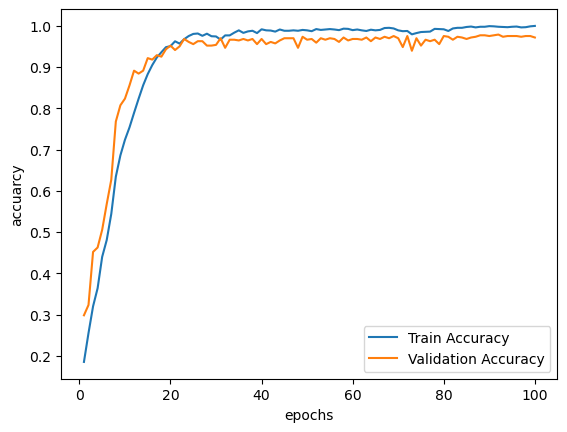

In [35]:
epochs=np.arange(1,101)
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

plt.plot(epochs,acc,label="Train Accuracy")
plt.plot(epochs,val_acc,label="Validation Accuracy")
plt.ylabel("accuarcy")
plt.xlabel("epochs")
plt.legend()
plt.show()

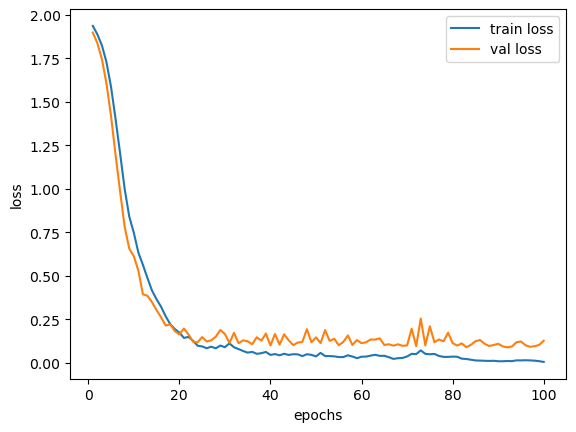

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
paths = []
labels = []
for dirname, _, filenames in os.walk('C:\\Users\\HP\\split-dataset2\\test'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        #print(filename)
        label=filename.split("_")[-1]
        #print(label)
        label=label.split(".")[0]
        labels.append(label.lower())
        #print(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [38]:
#craetinga dataframe
df_test=pd.DataFrame()
df_test["Speech"]=paths
df_test["Labels"]=labels
df_test.head()

,Speech,Labels
0,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
1,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
2,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
3,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
4,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry


In [39]:
x_mfcc_test=df_test["Speech"].apply(lambda x: extract_mfcc(x))

In [40]:
x_mfcc_test

0      [-405.55737, 81.68523, -4.52156, -28.166002, 3...
1      [-464.8119, 70.25581, 10.510636, -12.559641, -...
2      [-399.28394, 81.14322, 8.215181, -7.010703, -1...
3      [-434.54526, 82.24351, 17.994444, -10.9224205,...
4      [-428.4799, 96.80968, -12.797659, -25.83548, -...
                             ...                        
275    [-406.48053, 80.379875, 32.462395, 46.579094, ...
276    [-426.90918, 102.54756, 24.800041, 43.048096, ...
277    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
278    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
279    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: Speech, Length: 280, dtype: object

In [41]:
X_test=[x for x in x_mfcc_test]
X_test=np.array(X_test)
X_test.shape

(280, 50)

In [42]:
y_test=enc.fit_transform(df_test[["Labels"]])

In [43]:
y_test=y_test.toarray()
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [44]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 33ms/step


In [45]:
y_pred

array([[9.99928832e-01, 2.13668088e-08, 1.87214766e-07, ...,
        6.47597990e-05, 8.86611986e-07, 2.30116439e-06],
       [9.99985099e-01, 1.62568159e-09, 1.01719806e-08, ...,
        1.06400503e-05, 4.59348399e-07, 2.39625422e-07],
       [9.99984741e-01, 5.66890535e-09, 3.86892829e-08, ...,
        1.12247617e-05, 3.30343823e-07, 7.02028785e-07],
       ...,
       [1.08382003e-04, 6.95450362e-05, 3.71261081e-07, ...,
        1.58510591e-06, 1.99791862e-06, 9.99816835e-01],
       [4.40293843e-05, 1.66901664e-05, 1.57709636e-07, ...,
        1.00242767e-06, 1.07841504e-06, 9.99936700e-01],
       [1.20914025e-04, 3.93071095e-05, 3.08585925e-07, ...,
        1.52842358e-06, 2.17079310e-06, 9.99834776e-01]], dtype=float32)

In [46]:
emo_arr=np.array(["angry","disgust","fear","happy","neutral","ps","sad"])
df_test

,Speech,Labels
0,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
1,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
2,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
3,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
4,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry
...,...,...
275,C:\Users\HP\split-dataset2\test\YAF_sad\YAF_wi...,sad
276,C:\Users\HP\split-dataset2\test\YAF_sad\YAF_ye...,sad
277,C:\Users\HP\split-dataset2\test\YAF_sad\YAF_ye...,sad
278,C:\Users\HP\split-dataset2\test\YAF_sad\YAF_yo...,sad


In [47]:
emo_arr

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype='<U7')

In [48]:
l=[]
for a in y_pred:
    # print(a)
    z=a.argsort()
    l.append(emo_arr[z[-1]])
len(l)

280

In [49]:
df_test["Predicted"]=l

In [50]:
pd.set_option('display.max_rows',None)
df_test

,Speech,Labels,Predicted
0,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
1,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
2,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
3,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
4,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
5,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
6,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
7,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
8,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry
9,C:\Users\HP\split-dataset2\test\OAF_angry\OAF_...,angry,angry


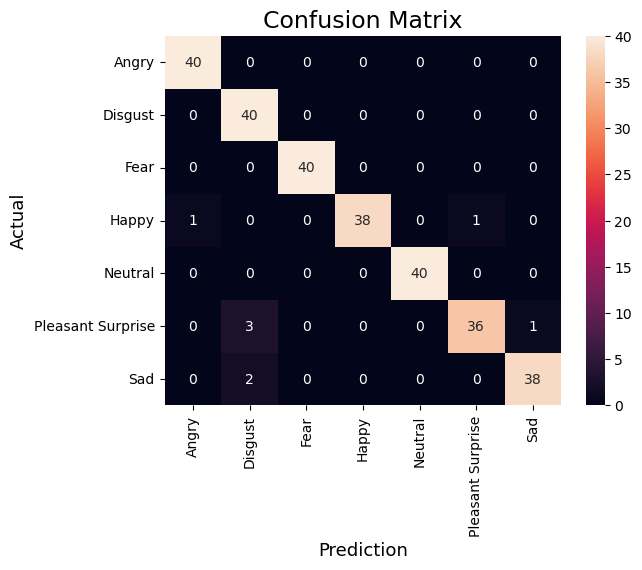

Accuracy   : 0.9714285714285714


In [51]:
#Import the necessary libraries 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt 
 
#Create the NumPy array for actual and predicted labels.
actual    = df_test["Labels"]
predicted = df_test["Predicted"]
 
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=["Angry","Disgust","Fear","Happy","Neutral","Pleasant Surprise","Sad"],
            yticklabels=["Angry","Disgust","Fear","Happy","Neutral","Pleasant Surprise","Sad"])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)